In [ ]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
urls = ['https://www.finki.ukim.mk/program/SIIS23/mk',
        'https://www.finki.ukim.mk/program/IMB23/mk',
        'https://www.finki.ukim.mk/program/PIT23/mk',
        'https://www.finki.ukim.mk/program/IE23/mk',
        'https://www.finki.ukim.mk/program/KI23/mk',
        'https://www.finki.ukim.mk/program/KN23/mk']

program = ['SIIS23', 'IMB23', 'PIT23', 'IE23', 'KI23', 'KN23']

names = []
names_e = []
programs = []
goals = []
codes = []
contents = []
reqs = []
semesters = []

for i, url in enumerate(tqdm(urls, desc="Scraping Progress")):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    li = soup.find_all('div', class_='col-md-6 col-sm-12')

    for j,elem in enumerate(li):
        filtered_links = elem.find_all('a', href=lambda href: href and href.startswith('/subject/'))
        for link in tqdm(filtered_links, desc=f"Processing {program[i]} Links", leave=False):
            semesters.append(j+1)
            programs.append(program[i])
            full_url = f"https://www.finki.ukim.mk{link['href']}"
            response = requests.get(full_url)
            soup = BeautifulSoup(response.text, 'html.parser')
            tbody = soup.find('tbody')
            tr_elements = tbody.find_all('tr')
            name_tr = tr_elements[0]
            tds = name_tr.find_all('td')
            ps = tds[2].find_all('p')
            names.append(ps[0].text.replace('\n', ''))
            names_e.append(ps[1].text.replace('\n', ''))
            code_tr = tr_elements[1]
            tds = code_tr.find_all('td')
            ps = tds[2].find_all('p')
            codes.append(ps[0].text.replace('\n', ''))
            req_tr = tr_elements[7]
            tds = req_tr.find_all('td')
            ps = tds[2].find_all('p')
            reqs.append(ps[0].text.replace('\n', ''))
            goals_tr = tr_elements[8]
            tds = goals_tr.find_all('td')
            ps = tds[1].find_all('p')
            goals.append(ps[1].text.replace('\n', ''))
            content_tr = tr_elements[9]
            tds = content_tr.find_all('td')
            ps = tds[1].find_all('p')
            contents.append(ps[1].text.replace('\n', ''))



Scraping Progress:   0%|          | 0/6 [00:02<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Program': programs,
    'Name': names,
    'Name_English': names_e,
    'Code': codes,
    'Requirements': reqs,
    'Goals': goals,
    'Content': contents,
    'Semester': semesters
})

df.head()

,Program,Name,Name_English,Code,Requirements,Goals,Content,Semester
0,SIIS23,Спорт и здравје,Sport and Health,F23L1W004,,Целта на предметот спорт и спортски активности...,"кошарка, мал фудбал, одбојка, ракомет, танцови...",1
1,SIIS23,Бизнис и менаџмент,Business and Management,F23L1W005,,"Развој на менаџерски способности: техничка, ко...",Предавања:\t1. Менаџерите на своето работно ме...,1
2,SIIS23,Вовед во компјутерските науки,Introduction to computer science,F23L1W007,,Солидно познавање на основите на информатичко-...,(1) Аналогно наспроти дигитално(2) Влезни уред...,1
3,SIIS23,Професионални вештини,Professional skills,F23L1W018,,Целта на курсот е да студентите да се стекнат ...,Предавања:\t1. Вовед во предметот\t2. Комуника...,1
4,SIIS23,Структурно програмирање,Structured programming,F23L1W020,,Да се воведат студентите во парадигмата на стр...,1. Вовед. Алгоритми и програми. Програмирање и...,1


In [ ]:
excel_file_path = 'output_data.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"DataFrame has been saved to {excel_file_path}")

DataFrame has been saved to output_data.xlsx


In [ ]:
urls.insert(0,"https://www.finki.ukim.mk/program/SEIS23/en")

In [ ]:
program.insert(0, "SEIS23")

In [ ]:
urls

['https://www.finki.ukim.mk/program/SEIS23/en',
 'https://www.finki.ukim.mk/program/SIIS23/mk',
 'https://www.finki.ukim.mk/program/IMB23/mk',
 'https://www.finki.ukim.mk/program/PIT23/mk',
 'https://www.finki.ukim.mk/program/IE23/mk',
 'https://www.finki.ukim.mk/program/KI23/mk',
 'https://www.finki.ukim.mk/program/KN23/mk']

In [ ]:
names = []
names_e = []
goals = []
codes = []
contents = []
reqs = []

for i, url in enumerate(tqdm(urls, desc="Scraping Progress")):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    filtered_links = soup.find_all('a', href=lambda href: href and href.startswith('/subject/'))
    for link in tqdm(filtered_links, desc=f"Processing {program[i]} Links"):
            full_url = f"https://www.finki.ukim.mk{link['href']}"
            response = requests.get(full_url)
            soup = BeautifulSoup(response.text, 'html.parser')
            tbody = soup.find('tbody')
            tr_elements = tbody.find_all('tr')
            name_tr = tr_elements[0]
            tds = name_tr.find_all('td')
            ps = tds[2].find_all('p')
            names.append(ps[0].text.replace('\n', ''))
            names_e.append(ps[1].text.replace('\n', ''))
            code_tr = tr_elements[1]
            tds = code_tr.find_all('td')
            ps = tds[2].find_all('p')
            codes.append(ps[0].text.replace('\n', ''))
            req_tr = tr_elements[7]
            tds = req_tr.find_all('td')
            ps = tds[2].find_all('p')
            reqs.append(ps[0].text.replace('\n', ''))
            goals_tr = tr_elements[8]
            tds = goals_tr.find_all('td')
            ps = tds[1].find_all('p')
            goals.append(ps[1].text.replace('\n', ''))
            content_tr = tr_elements[9]
            tds = content_tr.find_all('td')
            ps = tds[1].find_all('p')
            contents.append(ps[1].text.replace('\n', ''))

Scraping Progress: 100%|██████████| 7/7 [22:57<00:00, 196.86s/it]


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Name': names,
    'Name_English': names_e,
    'Code': codes,
    'Requirements': reqs,
    'Goals': goals,
    'Content': contents
    })

df.head()

,Name,Name_English,Code,Requirements,Goals,Content
0,Спорт и здравје,Sport and Health,F23L1W004,,Целта на предметот спорт и спортски активности...,"кошарка, мал фудбал, одбојка, ракомет, танцови..."
1,Бизнис и менаџмент,Business and Management,F23L1W005,,"Развој на менаџерски способности: техничка, ко...",Предавања:\t1. Менаџерите на своето работно ме...
2,Вовед во компјутерските науки,Introduction to computer science,F23L1W007,,Солидно познавање на основите на информатичко-...,(1) Аналогно наспроти дигитално(2) Влезни уред...
3,Професионални вештини,Professional skills,F23L1W018,,Целта на курсот е да студентите да се стекнат ...,Предавања:\t1. Вовед во предметот\t2. Комуника...
4,Структурно програмирање,Structured programming,F23L1W020,,Да се воведат студентите во парадигмата на стр...,1. Вовед. Алгоритми и програми. Програмирање и...


In [ ]:
excel_file_path = 'output_data.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"DataFrame has been saved to {excel_file_path}")

DataFrame has been saved to output_data.xlsx


In [ ]:
!pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 32.0 MB/s eta 0:00:00


In [ ]:
d = {}

In [ ]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
url = 'https://raspredelba.finki.ukim.mk/active-subjects?name=&semesterType=&results=1000'


casovi = []
abbs = []
subject = []
i = 0

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
trs = soup.find_all('tr')
print(len(trs))
for tr in trs:
  tds = tr.find_all('td')
  if len(tds) != 0:
    casovi.append(tds[0].text.split("]")[1])
    abbs.append(tds[0].text.split("[")[1].split("]")[0])
    subject.append(tds[0].text.split("[")[0])

    spans = tds[1].find_all('span')
    old_code = None
    new = None
    old = None
    new_code = None
    for span in spans:
      if 'F18' in span.text and '_EN' not in span.text:
        old_code = span.text.replace(" ", "").replace(";", "").replace("\n", "")[3:]
        old = span.text.replace(" ", "").replace(";", "").replace("\n", "")
      if 'F23' in span.text and '_EN' not in span.text:
        new_code = span.text.replace(" ", "").replace(";", "").replace("\n", "")[3:]
        new = span.text.replace(" ", "").replace(";", "").replace("\n", "")
    # print(old_code)
    # print(new_code)
    # if not new_code:
    #   print(subject[-1])

    if new_code and old_code:
      if new_code != old_code:
        i+=1
        print(f'{subject[-1]}, {new_code}, {old_code}')
        d[new] = new+old
        d[old] = new+old

164
Блоковски вериги и криптовалути , L3W121, L3S121
Вовед во биоинформатиката , L3W085, W3S085
Дизајн на дигитални кола , L2W041, L1W041
Дискретна математика , L2S011, L1W011
Дискретни структури 1 , L2W031, L1W031
Дискретни структури 2 , L2S032, L1S032
Економија за ИКТ инженери , L2W100, L2S100
Избрани теми од математика / Дискретна математика , L2W003, L1W011
Калкулус 1 , L2W033, L1W033
Калкулус 2 , L2S034, L1S034
Математика 1 / Калкулус , L2W002, L1S013
Мултимедијални технологии , L2W055, L3W055
Напредно програмирање , L3W140, L2W140
Објектно ориентирана анализа и дизајн , L2S015, L1S015
Основи на сајбер безбедноста , L2S066, L1S066
Персонализирано учење , L3W056, L3S056
Современи компјутерски архитектури , L3W158, L3S158
Физика , L2W049, L1W049


In [ ]:
d

{'F23L3W121': 'F23L3W121F18L3S121',
 'F18L3S121': 'F23L3W121F18L3S121',
 'F23L3W085': 'F23L3W085F18W3S085',
 'F18W3S085': 'F23L3W085F18W3S085',
 'F23L2W041': 'F23L2W041F18L1W041',
 'F18L1W041': 'F23L2W041F18L1W041',
 'F23L2S011': 'F23L2S011F18L1W011',
 'F18L1W011': 'F23L2W003F18L1W011',
 'F23L2W031': 'F23L2W031F18L1W031',
 'F18L1W031': 'F23L2W031F18L1W031',
 'F23L2S032': 'F23L2S032F18L1S032',
 'F18L1S032': 'F23L2S032F18L1S032',
 'F23L2W100': 'F23L2W100F18L2S100',
 'F18L2S100': 'F23L2W100F18L2S100',
 'F23L2W003': 'F23L2W003F18L1W011',
 'F23L2W033': 'F23L2W033F18L1W033',
 'F18L1W033': 'F23L2W033F18L1W033',
 'F23L2S034': 'F23L2S034F18L1S034',
 'F18L1S034': 'F23L2S034F18L1S034',
 'F23L2W002': 'F23L2W002F18L1S013',
 'F18L1S013': 'F23L2W002F18L1S013',
 'F23L2W055': 'F23L2W055F18L3W055',
 'F18L3W055': 'F23L2W055F18L3W055',
 'F23L3W140': 'F23L3W140F18L2W140',
 'F18L2W140': 'F23L3W140F18L2W140',
 'F23L2S015': 'F23L2S015F18L1S015',
 'F18L1S015': 'F23L2S015F18L1S015',
 'F23L2S066': 'F23L2S066F18L

In [ ]:
i

18

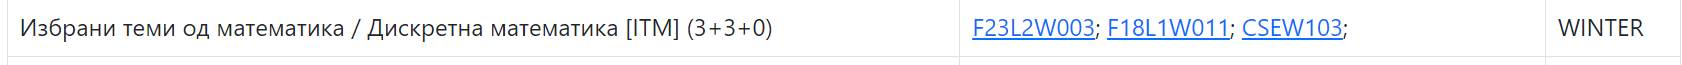

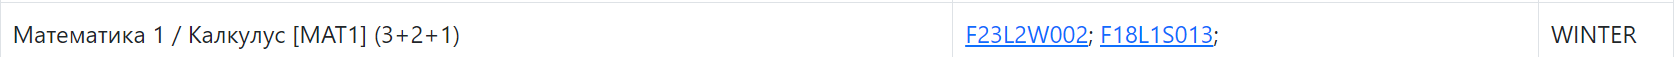